# Análise grupo Telegram: USP_Python

O objetivo desse trabalho é utilizar técnicas de NLP (nuvem de palarvas, extração de sentimentos, extração de tópicos etc), montando um código em Python comentado e explicado.  



O primeiro passo é fazer a extração das mensagens do grupo de dentro do Telegram. Para isso é necessário baixar o aplicativo do <a href="https://desktop.telegram.org/">Telegram para Desktop</a>. E seguir <a href ="https://www.youtube.com/watch?v=8Jpxdg86dmc">esse</a> passo a passo de como fazer a extração de todas as mensagens, fotos e documentos. Na hora de escolher o formato de dado a ser baixado é necessário escolher o formato .JSON

Segue um resumo básico das bibliotecas em Python que vamos utilizar para fazer nossa análise:

* Pandas: Utilizado para manipulação e análise de dados, convertendo os dados para a estrutura de Dataframes. 
* Numpy: Utilizado para manipulação de dados, e operações matemáticas.
* Json: Utilizado para ler aquivos .json 
* Nltk: Utilizado para aplicar técnias de NLP em nossos dados. 
* Matplotlib: Utilizado para printar gráficos e imagens. 
* [OUTRAS BIBLIOTECAS VÃO SER ADICIONADAS]

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import json
import nltk
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Configurando a biblioteca pandas para mostrar todos os dados dentro do nosso Dataframe
pd.set_option("display.max_rows", 9999)
pd.set_option("display.max_columns", 99)

In [2]:
# Abrindo o arquivo result.json que contem todas as mensagem extraidas do grupo
f = open("data/result.json", encoding="utf8")

# Carregando as mensagens do result.json
data = json.load(f)

# Carregando os campos importantes para construção do nosso Dataframe
msgs = data["messages"]

# Printando a estrutura de dados que contem informações sobre as mensagens do grupo
msgs

[{'id': 1,
  'type': 'service',
  'date': '2021-09-01T14:20:03',
  'actor': 'USP - Python',
  'actor_id': 'channel1551445997',
  'action': 'migrate_from_group',
  'title': 'USP - Python',
  'text': ''},
 {'id': 2,
  'type': 'message',
  'date': '2021-09-01T14:20:32',
  'from': 'Ronnan',
  'from_id': 'user1034031624',
  'text': 'Olá'},
 {'id': 3,
  'type': 'message',
  'date': '2021-09-01T14:21:03',
  'from': 'Ronnan',
  'from_id': 'user1034031624',
  'text': 'O/'},
 {'id': 4,
  'type': 'message',
  'date': '2021-09-01T14:21:04',
  'from': 'Ronnan',
  'from_id': 'user1034031624',
  'photo': 'photos/photo_1@01-09-2021_14-21-04.jpg',
  'width': 1280,
  'height': 960,
  'text': ''},
 {'id': 5,
  'type': 'message',
  'date': '2021-09-01T14:21:10',
  'from': 'Maria Silva',
  'from_id': 'user872502354',
  'text': ':-)'},
 {'id': 6,
  'type': 'message',
  'date': '2021-09-01T14:21:14',
  'from': 'Rosario',
  'from_id': 'user1205449964',
  'text': 'olá pessoal'},
 {'id': 7,
  'type': 'message',

In [3]:
# Formatando e limpando a coluna "text" para remover textos desnecessários para análise
remove_strings = ["[", "]", "{", "}", "'type':", "'mention',", "'link',", "'text':", "'user_id':"]

for msg in msgs:
    for string in remove_strings:
        msg["text"] = str(msg["text"]).replace(string, "")

Aqui vamos constuir o Dataframe contento toda a informação extraida do grupo. Nesse momento nossos campos mais importantes são: "from" que representa de quem é a mensagem, e "text" que é a própria mensagem. 

In [4]:
# Construindo o Dataframe a partir da variavél msgs que foi formatada
df = pd.DataFrame(msgs)

# Printando o Dataframe
df

,id,type,date,actor,actor_id,action,title,text,from,from_id,photo,width,height,members,reply_to_message_id,file,thumbnail,mime_type,edited,poll,message_id,forwarded_from
0,1,service,2021-09-01T14:20:03,USP - Python,channel1551445997,migrate_from_group,USP - Python,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,message,2021-09-01T14:20:32,NaN,NaN,NaN,NaN,Olá,Ronnan,user1034031624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,message,2021-09-01T14:21:03,NaN,NaN,NaN,NaN,O/,Ronnan,user1034031624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,message,2021-09-01T14:21:04,NaN,NaN,NaN,NaN,,Ronnan,user1034031624,photos/photo_1@01-09-2021_14-21-04.jpg,1280.0,960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,message,2021-09-01T14:21:10,NaN,NaN,NaN,NaN,:-),Maria Silva,user872502354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,message,2021-09-01T14:21:14,NaN,NaN,NaN,NaN,olá pessoal,Rosario,user1205449964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,message,2021-09-01T14:21:14,NaN,NaN,NaN,NaN,Oi,Sara Lais,user1156969070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,message,2021-09-01T14:21:42,NaN,NaN,NaN,NaN,Olá a todos!,Malu,user1197243447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,service,2021-09-01T14:21:46,H.C l Economista,user657549331,remove_members,NaN,,NaN,NaN,NaN,NaN,NaN,[Fernanda Moreira],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,message,2021-09-01T14:21:48,NaN,NaN,NaN,NaN,opa !!!,Cleyton Santana de Sousa,user1520176767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Com o Pandas podemos acessar os atributos .shape e .columns, assim podemos verificar as dimensões e colunas do Dataframe. São 1899 registros e 22 colunas. 

In [5]:
# Estrutura do Dataframe
df.shape

(1899, 22)

In [6]:
# Nome de todas as colunas do Dataframe
df.columns

Index(['id', 'type', 'date', 'actor', 'actor_id', 'action', 'title', 'text',
       'from', 'from_id', 'photo', 'width', 'height', 'members',
       'reply_to_message_id', 'file', 'thumbnail', 'mime_type', 'edited',
       'poll', 'message_id', 'forwarded_from'],
      dtype='object')

O próximo passo é agrupar as mensagens por autor e plotar os 10 autores com mais mensagens dentro do grupo. Para isso utilizamos os métodos groupby() e plot() do Pandas. 

In [7]:
# Criando um novo Dataframe que vai receber o agrupamento a partir da coluna "from" que representa os autores das mensagens
# Também usamos o método count()
df_top10_text = df[['text','from']].groupby(['from']).count().sort_values(['text'], ascending=False).head(10)

# Resetando o index do Dataframe 
df_top10_text.reset_index(inplace=True)

# Printando o Dataframe
df_top10_text

,from,text
0,H.C l Economista,72
1,Lucas Fávero,61
2,Cleyton Santana de Sousa,59
3,Pacheco - BCC 020,57
4,Josi Carmosini,40
5,Feline JJ,37
6,Susana Silva,36
7,J. RODRIGO,35
8,Diego Santos,32
9,Gianlucca Florêncio,30


<AxesSubplot:xlabel='from'>

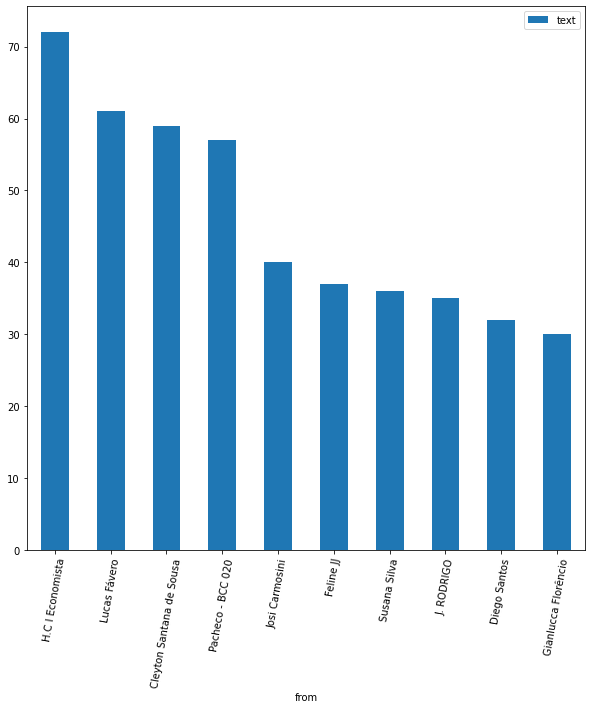

In [8]:
# Usando o método plot.bar() do Pandas para printar um gráfico de barras do novo Dataframe que foi criado anteriormente
df_top10_text.plot.bar(x= "from", y="text", rot=80, figsize=(10, 10))

# Utilizando a biblioteca WordCloud para construir uma nuvem de palavras

O primeiro passo é coletar todas as mensagens e colocar em uma única variavel. E a partir dessa única variavél contento todas as palavras das mensagens, vamos utilizar a biblioteca WordCloud para imprimir as palavras com maior frequência. 

In [14]:
# Agrupando todas as mensagens do Dataframe na coluna "text" em uma única variavél.
text = " ".join(text for text in df.text)

# Printando o total de palavras e as mensagens 
print (f"O texto contém {len(text)} palavras.")
print("\n\n")
print(text)

O texto contém 86180 palavras.



 Olá O/  :-) olá pessoal Oi Olá a todos!  opa !!! Boa tarde, pessoal, boa aula boa galera Boa tarde Galera Boa tarde, gente! Qual o nível de Python da turma aí? Sou iniciante ainda galera, depois divulga nosso link Dando os primeiros passos Iniciante também lah no you tube não da para enviar o link iniciante Mais trabalho com muitas análises de dados iniciante todos nos iniciando na programação Então unindo o útil ao agradável rsrs E ai pessoal! Boa tarde! vcs ja estão com acesso ao Moodle?    'https://cursosextensao.usp.br/course/view.php?id=2721' esse é o moodle ainda não tem material disponível Para que serve? Opa, boa tarde gente Para pegar os materiais pras próximas aulas por enquanto não tem nada só uma bibliografia básica Nesse link vão ser disponibilizados os slides das aulas e informações futuras. Boa tarde! 'Link para formulário pra questões e comentários: ',    'https://docs.google.com/forms/d/e/1FAIpQLSf3gsE-_UGXw3b-aMi7C35HrlR_Uzo2MhPoIj9a

Segundo passo é utilizar as 86.180 palavras para construir um modelo de nuvem de palavras. Para isso utilizamos a classe WordCloud, ela constrói um objeto que conta a frêquencia das palavras, e as palavras mais frequentes são distribuídas em um gráfico. 

Um conceito interessante que é usado na construção desse modelo é "stopwords", stopwords são palavras que não agregam valor significativo para geração de insights. Exemplos de stopwords: artigos (o, a, e, um, uma, etc) e preposicões (de, para, pode, se, etc). Então o modelo remove essas palavras.  

In [10]:
# Utilizando a biblioteca WordCloud para construir o modelo que faz a contagem da frequência das palavras mais utilizadas
stopwords = nltk.corpus.stopwords.words('portuguese')
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1800, height=900).generate(text)

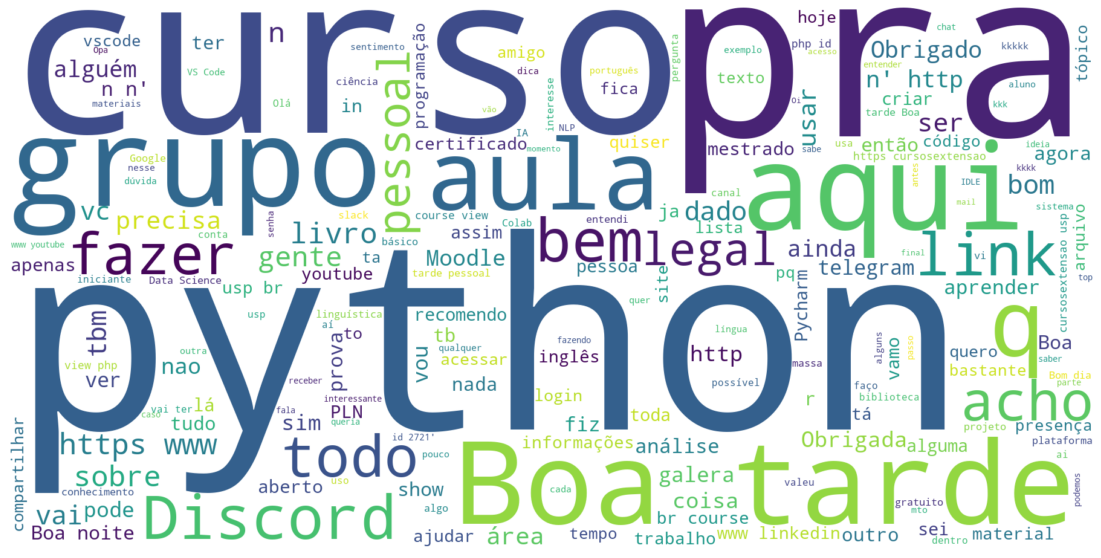

In [11]:
# Utilizando a biblioteca matplotlib para printar a imagem construída pela WordCloud
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Ainda existem alguns termos como: "http, www, ja, tá" que não nos explicam muita coisa e também podem ser removidos, o próximo passo vai ser limpar ainda mais esse modelo. Adicionando esses termos na lista de stopwords.